<a href="https://colab.research.google.com/github/Hinoto04/2021_PNUAC_AIData/blob/main/mlp_pima_indians_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

훈련셋 700 시험셋 68 속성 8 클래스 2

1.   임신 횟수
2.   경구 포도당 내성 검사에서 혈장 포도당 농도
3.   이완기 혈압
4.   삼두근 피부 두겹 두께
5.   2시간 혈청 인슐린
6.   체질량 지수
7.   당뇨 직계 가족력
8.   나이



In [1]:
import numpy as np

x_test = np.loadtxt('x_test.csv', delimiter=',')
np.set_printoptions(suppress=True)
print(x_test)

[[  2.    122.     76.     27.    200.     35.9     0.483  26.   ]
 [  6.    125.     78.     31.      0.     27.6     0.565  49.   ]
 [  1.    168.     88.     29.      0.     35.      0.905  52.   ]
 [  2.    129.      0.      0.      0.     38.5     0.304  41.   ]
 [  4.    110.     76.     20.    100.     28.4     0.118  27.   ]
 [  6.     80.     80.     36.      0.     39.8     0.177  28.   ]
 [ 10.    115.      0.      0.      0.      0.      0.261  30.   ]
 [  2.    127.     46.     21.    335.     34.4     0.176  22.   ]
 [  9.    164.     78.      0.      0.     32.8     0.148  45.   ]
 [  2.     93.     64.     32.    160.     38.      0.674  23.   ]
 [  3.    158.     64.     13.    387.     31.2     0.295  24.   ]
 [  5.    126.     78.     27.     22.     29.6     0.439  40.   ]
 [ 10.    129.     62.     36.      0.     41.2     0.441  38.   ]
 [  0.    134.     58.     20.    291.     26.4     0.352  21.   ]
 [  3.    102.     74.      0.      0.     29.5     0.121  32.

In [2]:
x_train = np.loadtxt('x_train.csv', delimiter=',')
y_train = np.loadtxt('y_train.csv', delimiter=',')

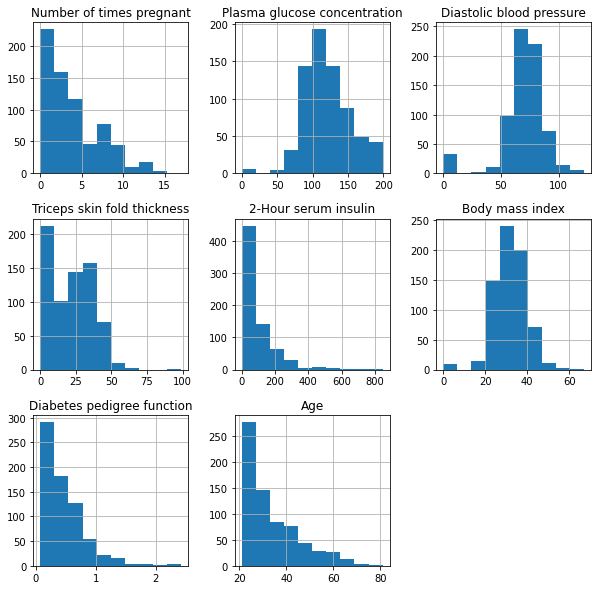

In [3]:
import pandas as pd

df = pd.DataFrame(x_train)
df = df.rename(columns={0: 'Number of times pregnant', 
                                  1: 'Plasma glucose concentration',
                                  2: 'Diastolic blood pressure',
                                  3: 'Triceps skin fold thickness',
                                  4: '2-Hour serum insulin',
                                  5: 'Body mass index',
                                  6: 'Diabetes pedigree function',
                                  7: 'Age'})

histo = df.hist(figsize = [10, 10])

In [4]:
print( (y_train == 0).sum() )
print( (y_train == 1).sum() )

459
241


In [5]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

print(mean, std)

[  3.82714286 120.54142857  68.88        20.38285714  79.88
  31.89128571   0.47601857  33.12428571] [  3.36199012  32.1858398   19.52675527  16.02076306 115.50752554
   7.94429686   0.33711587  11.77613732]


In [6]:
import numpy as np

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [7]:
model = Sequential([
      Dense(32, input_dim=8, activation='relu'),
      Dense(16, activation='relu'),
      Dense(1, activation='sigmoid')
])

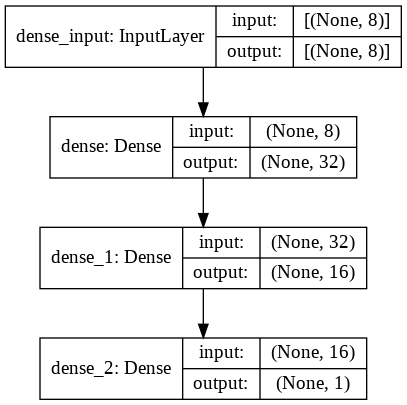

In [8]:
plot_model(model, show_shapes=True)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
checkpoint_callback = ModelCheckpoint("best_model.h5",
                                      save_best_only=True,
                                      monitor="val_loss")

hist = model.fit(x_train, y_train,
                 validation_split=0.2,
                 epochs=100,
                 batch_size=32,
                 callbacks=[checkpoint_callback])

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3943 - accuracy: 0.8089 - val_loss: 0.4016 - val_accuracy: 0.7786
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3927 - accuracy: 0.8107 - val_loss: 0.3993 - val_accuracy: 0.7929
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3917 - accuracy: 0.8196 - val_loss: 0.4019 - val_accuracy: 0.7857
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.8125 - val_loss: 0.3968 - val_accuracy: 0.8000
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3902 - accuracy: 0.8107 - val_loss: 0.3980 - val_accuracy: 0.8000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.8125 - val_loss: 0.4025 - val_accuracy: 0.7929
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8107 - val_loss: 0.4026 - val_accuracy: 0.7929
Epoch 8/100
1

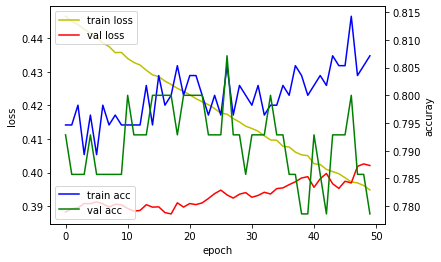

In [15]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
model = load_model("best_model.h5")

x_test -= mean
x_test /= std

y_pred = (model.predict(x_test)>0.5).astype("int32")
np.savetxt('y_pred.csv', y_pred, fmt='%i')

In [16]:
x_real = [[2., 122., 76., 27., 200., 35.9, 0.483, 26.]]

x_real -= mean
x_real /= std

y_real = model.predict(x_real)

print(y_real)

[[0.25622362]]
